In [1]:
import pyvisa
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rm = pyvisa.ResourceManager('@py')

In [83]:
rm.close()

In [3]:
rl = rm.list_resources()
print(rl[0])

USB0::62700::60986::SDS1MEBC3R1284::0::INSTR


In [4]:
inst = rm.open_resource(rl[0], write_termination='\n', read_termination='\n')

In [5]:
print(inst.query("*IDN?"))

Siglent,SDS1102CML+,SDS1MEBC3R1284,6.01.01.20


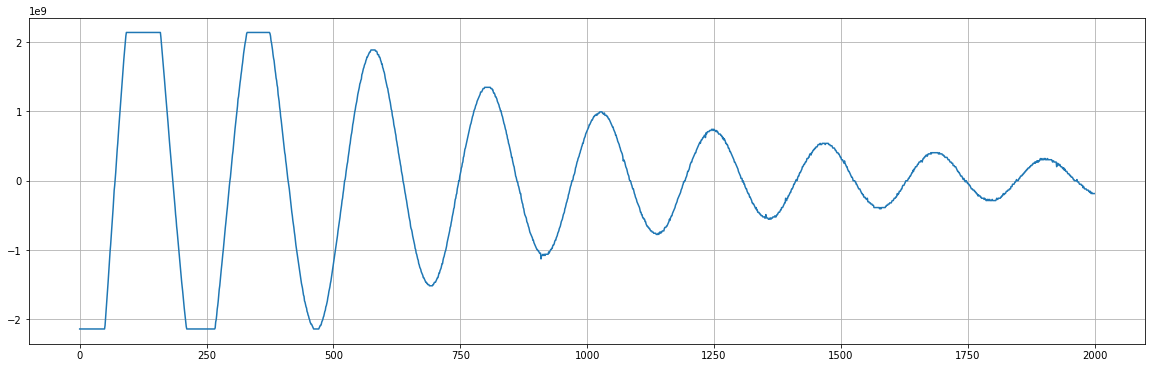

2000


In [6]:
data = np.array(inst.query_binary_values("C2:WF? DAT2", datatype='l')[500:2500]) 
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data)
ax.grid()
plt.show()
print(len(data))

In [11]:
data = []
for _ in range(128):
    data.append(np.array(inst.query_binary_values("C2:WF? DAT2", datatype='l')[1000:]) )

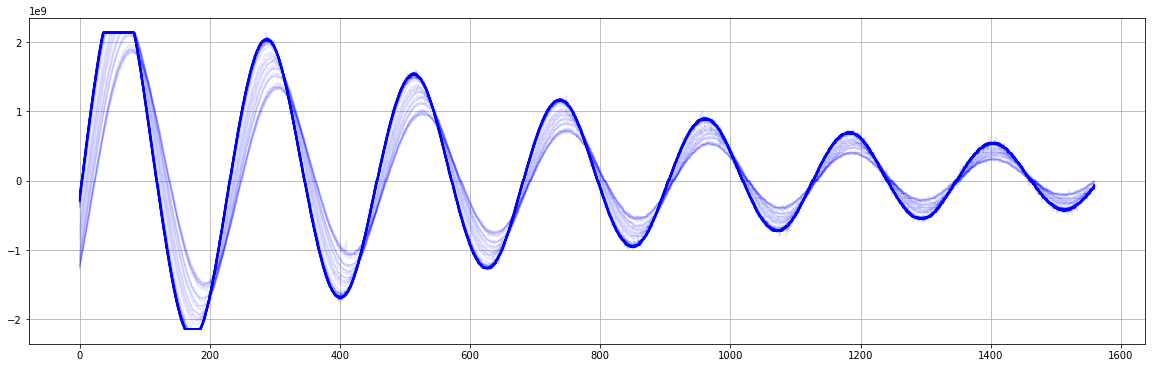

128


In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
for _ in data:
    ax.plot(_, alpha=0.1, c='b')
ax.grid()
plt.show()
print(len(data))

In [24]:
q = []
for dd in data:
    b = True
    c = 0
    _ = []
    for d in dd:
        if b:
            if d < 0:
                _.append([c, 1 if b else 0])
                b = not b
                
        else:
            if d >= 0:
                _.append([c, 1 if b else 0])
                b = not b
        c += 1
    q.append(_)
                
        

In [26]:
for d in q[:10]:
    print(d[3])

[231, 0]
[233, 0]
[248, 0]
[233, 0]
[231, 0]
[232, 0]
[231, 0]
[231, 0]
[231, 0]
[231, 0]


In [30]:
import seaborn as sns
import pandas as pd

In [104]:
s = []
for si in range(1,15):
    df = pd.DataFrame([_[si] for _ in q], columns=['t', 'v'])
    s.append(df['t'].value_counts().tolist())

In [105]:
s

[[73, 26, 8, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [73, 27, 7, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [70, 27, 7, 5, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [69, 29, 6, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [57, 45, 4, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1],
 [73, 26, 6, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1],
 [71, 20, 17, 6, 4, 2, 2, 1, 1, 1, 1, 1, 1],
 [61, 41, 8, 5, 3, 2, 2, 2, 2, 1, 1],
 [58, 43, 5, 5, 4, 3, 3, 2, 2, 1, 1, 1],
 [62, 30, 12, 7, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1],
 [61, 26, 16, 5, 4, 4, 4, 4, 2, 1, 1],
 [55, 37, 11, 5, 5, 4, 3, 3, 2, 1, 1, 1],
 [60, 44, 5, 4, 4, 3, 3, 2, 1, 1, 1],
 [49, 42, 9, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1]]

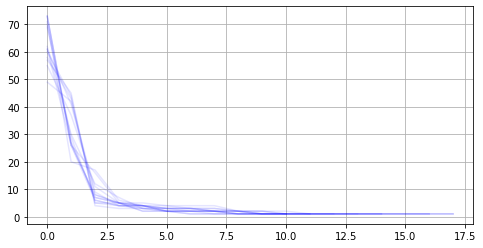

In [60]:
fig, ax = plt.subplots(figsize=(8, 4))
for _ in s:
    ax.plot(_, alpha=0.1, c='b')
ax.grid()
plt.show()

In [106]:
ss = []
for _ in s:
    i = 0
    v = []
    for __ in _:
        v.append(np.log10(__))
        i += 1
    while i < 16:
        v.append(0)
        i += 1
    ss.append(v)
        

In [ ]:
X = range(15)
Y = range(15)
Z = ss
np.shape(Z)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')


np.shape(Z)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [ ]:

# Plot the surface.

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()